## Perkenalan

Notebook ini dibuat oleh I Wayan Budi, FTDS-001. Buddy Raka Ardhi

Case:\
Saya di kontak oleh seorang Influencer terkenal dengan follower sosmed 500k yang akan membuat Project di Kickstarter. Dia kebingungan untuk memilih kategori project yang dimau, antara Music atau Dance.\
Dia beranggapan Music lebih sukses dari Dance dalam jumlah Plegde.\
\
Saya sebagai seorang Data Scientist akan melakukan pengetesan hypothesis terhadap pendapat tersebut.

## Import Pustaka

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

## Data Loading

In [82]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Explorasi Data

In [83]:
df.shape #mengetahui jumlah index dan column

(378661, 15)

In [84]:
df.isnull().sum() #cek index yang kosong

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [85]:
#melihat mean dari setiap main category
df.groupby('main_category')['usd_pledged_real'].count()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
Name: usd_pledged_real, dtype: int64

In [86]:
#menampilkan info statistik deksriptif 
df.groupby('state').describe()

ID                                                      \
               count          mean           std       min           25%   
state                                                                      
canceled     38779.0  1.076086e+09  6.192748e+08   92158.0  5.409772e+08   
failed      197719.0  1.074639e+09  6.192215e+08    5971.0  5.385642e+08   
live          2799.0  1.084275e+09  6.123351e+08  511375.0  5.753541e+08   
successful  133956.0  1.073727e+09  6.191514e+08   21109.0  5.354443e+08   
suspended     1846.0  1.094302e+09  6.150032e+08  560661.0  5.799523e+08   
undefined     3562.0  1.085224e+09  6.145164e+08  629014.0  5.575375e+08   

                                                          goal                 \
                     50%           75%           max     count           mean   
state                                                                           
canceled    1.079424e+09  1.611351e+09  2.147388e+09   38779.0   86193.059649   
failed      1.073242e+09  1.611052e+09  2.147467e+09  197719.0   67346.845539   
live        1.074350e+09  1.610678e+09  2.146469e+09    2799.0   76762.393355   
successful  1.076595e+09  1.608161e+09  2.147476e+09  133956.0   10162.960544   
suspended   1.099296e+09  1.624866e+09  2.147267e+09    1846.0  181370.796858   
undefined   1.078597e+09  1.613349e+09  2.147454e+09    3562.0    4405.393599   

            ... usd_pledged_real              usd_goal_real                 \
            ...              75%          max         count           mean   
state       ...                                                              
canceled    ...         906.5350   1076751.05       38779.0   75579.415376   
failed      ...         663.0000    757352.94      197719.0   63174.742222   
live        ...        1798.0000    724423.80        2799.0   62535.280915   
successful  ...       13232.0750  20338986.27      133956.0    9532.853357   
suspended   ...        1354.9750   4005111.42        1846.0  175208.010265   
undefined   ...        3931.4975     14997.93        3562.0    4103.022038   

                                                                                
                     std    min        25%        50%        75%           max  
state                                                                           
canceled    1.281389e+06   0.01  3290.0900  10000.000  30000.000  1.000000e+08  
failed      1.435683e+06   0.15  2500.0000   7500.000  20000.000  1.663614e+08  
live        1.875468e+06   1.00  2052.6800   6547.090  18505.490  9.900000e+07  
successful  2.796144e+04   0.01  1301.9150   3837.740  10000.000  2.015609e+06  
suspended   3.444548e+06   0.58  1000.0000   5000.000  20000.000  1.000000e+08  
undefined   2.792085e+03  85.28  2238.5975   3530.425   5038.165  7.735747e+04  

[6 rows x 56 columns]

## Data Cleansing

Dalam Case Notebook ini, fokus membandingkan projek yang sukses pada 2 main_category dengan nilai pada sd_pledged real.\
Untuk mengukur central tendency, perhitungan usd_pledged_real memasukkan semua main_category

In [87]:
#setelah didapat ada index nama yang kosong pada query sebelumnya, akan dilakukan pengecekan ulang.
df[df['name'].isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [88]:
#kemudian 4 index tersebut di drop pada df yang sama
df.drop(df[df['name'].isna()].index, inplace=True)

In [89]:
#pengecekan ulang apakah sudah berhasil terhapus apa belum
df[df['name'].isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


In [90]:
#pengecekan jumlah index yang tidak sukses, yang kemudian akan di exclude di df2
df[(df['state'] == 'successful') == False].shape[0]

244701

In [91]:
#memindahkan data yang digunakan ke df2
df2 = df.drop(df[(df['state'] == 'successful') == False].index)

In [92]:
#melakukan drop berbagai kolom yang tidak digunakan
to_drop = ['ID','category', 'state', 'currency', 'deadline','goal',
            'launched','pledged', 'country', 'backers','usd pledged', 'usd_goal_real']


df2.drop(to_drop, axis=1, inplace=True)

In [93]:
#menampilkan mean usd_pledged_real pada setiap main_category
df2.groupby('main_category')['usd_pledged_real'].mean()

main_category
Art              6971.894850
Comics          11385.660235
Crafts           5629.696889
Dance            5194.016121
Design          62858.524147
Fashion         20286.555534
Film & Video    13951.872429
Food            17349.390516
Games           54228.755136
Journalism      10344.950316
Music            7338.132395
Photography     10111.690306
Publishing       9436.910726
Technology      93085.762218
Theater          5973.134904
Name: usd_pledged_real, dtype: float64

In [94]:
df2.groupby('main_category')['usd_pledged_real'].std()

main_category
Art              33621.791990
Comics           32370.823714
Crafts           14975.392246
Dance             6621.864866
Design          359087.262447
Fashion          57724.185925
Film & Video     66624.369579
Food             60771.046745
Games           279199.045246
Journalism       19341.659647
Music            17969.707902
Photography      33475.460024
Publishing       25375.652585
Technology      266480.114135
Theater          12739.644747
Name: usd_pledged_real, dtype: float64

In [95]:
#menampilkan jumlah index dan column di df2
df2.shape

(133956, 3)

In [96]:
df2.dtypes

name                 object
main_category        object
usd_pledged_real    float64
dtype: object

In [97]:
#menampilkan data yang digunakan untuk proses selanjutnya
df2.head()

,name,main_category,usd_pledged_real
5,Monarch Espresso Bar,Food,52375.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,1205.00
11,Lisa Lim New CD!,Music,12700.00
14,Tombstone: Old West tabletop game and miniatur...,Games,121857.33
18,Mike Corey's Darkness & Light Album,Music,250.00


## Measure of Central Tendency

In [98]:
print('Min:' + str(df2['usd_pledged_real'].min()))
print('Mode:' + str(df2['usd_pledged_real'].mode()[0]))
print('Median:' + str(df2['usd_pledged_real'].median()))
print('Mean:' + str(df2['usd_pledged_real'].mean()))
print('Max:' + str(df2['usd_pledged_real'].max()))

Min:0.79
Mode:1000.0
Median:5107.25
Mean:22670.795231195676
Max:20338986.27


## Measure of Variance

In [99]:
print('Std Deviation:' + str(df2['usd_pledged_real'].std()))
print('Range:' + str((df2['usd_pledged_real'].max()) - (df2['usd_pledged_real'].min())))
print('Variance:' + str(df2['usd_pledged_real'].var()))

Std Deviation:151090.3233521527
Range:20338985.48
Variance:22828285810.658066


## Hypothesis Testing

Karena membandingkan antara dua main category, maka akan dilakukan two-sample t test

h0:μMusic-μDance=0\
ha:μMusic-μDance≠0

In [100]:
np.random.seed(200)
music = np.random.normal(7338.132395, 17969.707902, 100)
dance = np.random.normal(5194.016121, 6621.864866, 100)
print("music sample mean:" + str(music.mean()))
print("dance sample mean:" + str(dance.mean()))

music sample mean:9970.259037821688
dance sample mean:5204.735030656946


In [101]:
# Paired (related) test
t,p = stats.ttest_rel(dance, music)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))
pop = np.random.normal(music.mean(), music.std(), 100000)

t-statistic:-2.576592304417014
p-value:0.005727


## Confidence Interval

Menghitung 90%Confidence interval, alpha=0.1

In [102]:
ci = stats.norm.interval(0.90, music.mean(), music.std())
print(ci)

(-20568.544885140655, 40509.062960784024)


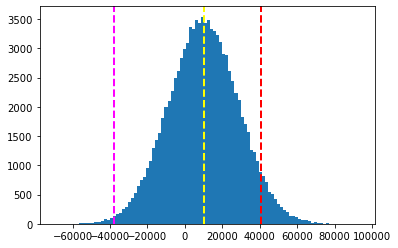

In [103]:
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Hasil Intepretasi\
P-value dibawah α, artinya harus reject the null hypotesis dan mengambil kesimpulan main category Music greater than dance.\
Accept Ha

## Pengambilan Keputusan

-Setelah uji hipotesis, saya memberikan rekomendasi kepada influencer tersebut untuk membuat project Music
